In [1]:
import matplotlib.pyplot as plt
import numpy as np
import csv
import os
from os.path import basename

In [2]:
def lectorcsv(rutaarchivo):
    file = str(rutaarchivo)
    epoch=[]
    acc=[]
    loss=[]
    with open(file, newline='') as csvfile:
        #Asume que la primera línea es de encabezados segun: 'epoch, acc, loss'
        reader = csv.reader(csvfile, delimiter=',')
        for row in reader:
            epoch.append(row[0])
            acc.append(row[1])
            loss.append(row[2])
        epoch = np.array(epoch[1:],dtype='float32').reshape([len(epoch[1:]),1])
        acc = np.array(acc[1:],dtype='float32').reshape([len(acc[1:]),1])
        loss = np.array(loss[1:],dtype='float32').reshape([len(loss[1:]),1])
    return epoch,acc,loss

In [3]:
def buscador_archivos(Carpeta_Madre, Extension):
    Listado=[]
    for root, dirs, files in os.walk(Carpeta_Madre):
        for file in files:
            File_Lower = file.lower()
            if file.endswith(Extension):
                Listado.append(root+'/'+file)
    return np.sort(Listado)

In [4]:
def plotearlogs(listaarchivos,itercomienzo=0):
    leyendas = []
    for archivo in listaarchivos:
        nombre=basename(archivo[:-4])
        leyendas.append(nombre)
        epoch,acc,loss=lectorcsv(archivo)
        plt.plot(np.array(range(itercomienzo,loss.shape[0])).reshape([loss.shape[0]-itercomienzo]),loss[itercomienzo:])
    plt.legend(leyendas)
    plt.xlabel('Iteraciones')
    plt.ylabel('Error Cuadrático Medio (MSE)')

In [8]:
%matplotlib notebook

<IPython.core.display.Javascript object>


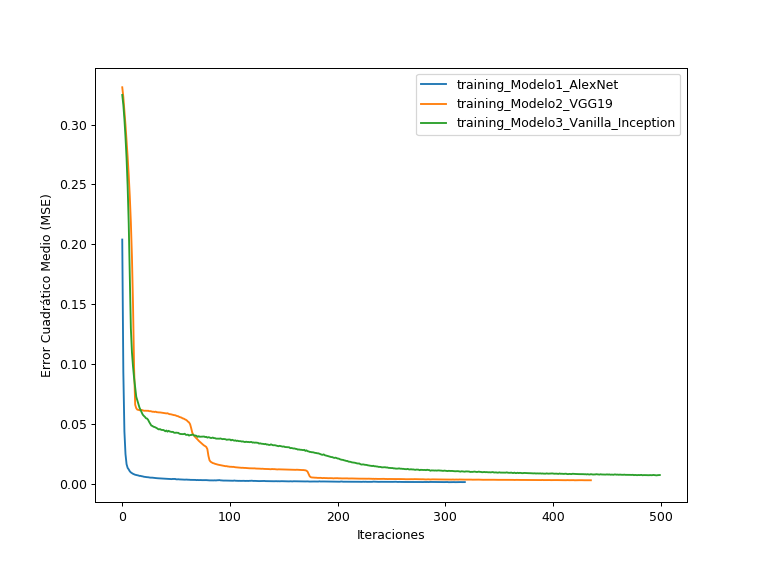

In [16]:
a=buscador_archivos('RUTA_A_LOS_LOGS', '.log')
plotearlogs(a,0)